<a href="https://colab.research.google.com/github/wkdalsgh192/helloworld/blob/master/EDA_minho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is EDA?**
  Exploratory Data Analysis, which is also known as EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. </p>
  1. Poping up a sample of the data set you have (w/ .head()), you can see the names of columns, the number of rows and columns (w/ .shape()), the data types and null values (w/ .info())  </p> 
  2. In each column, you can check the unique values and its frequency (w/ .unique() and .value_counts() ) </p>
  3. Finally, explore data with beautiful graphs such as heatmap, box plot, distribution plot or regplot (run by seaborn, matplotlib)

In [110]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [111]:
cd /content/gdrive/My Drive

/content/gdrive/My Drive


# Importing Packages In Advance
  

* 'datatime' package : one of the modules that python has in order to work with dates and times. Commonly used classes are 1. date class 2. time class 3. datetime class 4. timedelta class.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np
import datetime

## Changing to pd.to_datetime format
 </p>

In version 0.18.1 you can use to_datetime, but:

  * names of columns have to be year, month, day, hour, minute
  * minimal columns are year, month and day    </p>
  
Functions to use
 * Lambda function : In Python, anonymous function means that a function is without a name. As we already know that def function is used to define the normal functions, lambda keyword is used to create anonymous functions. Its syntax is followed by: *lambda arguments : expressions*

In [113]:
# ------------------------------------------------------------------------------------------
# Sample coding using the def function
def make_date(x, y, z):
  my_date = str(x) + str(y) + str(z)
  return datetime.datetime.strptime(my_date, '%Y%m%d').date()


df = pd.read_csv("AFSNT.csv")
df['Date'] = df.apply(lambda x : make_date(x['SDT_YY'], x['SDT_MM'], x['SDT_DD']), axis =1)
print(df.tail())

#___________________________________________________________________________________________
# Sample coding using pd.DataFrame
#df_date = pd.DataFrame({'year': df1['SDT_YY'], 'month': df1['SDT_MM'], 'day': df1['SDT_DD'], 'hour': df1['STT']})
#df1['Date'] = pd.to_datetime(df_date[['year', 'month', 'day']])

        SDT_YY  SDT_MM  SDT_DD SDT_DY   ARP  ... DLY  DRR CNL  CNR        Date
987704    2019       6      30     ÀÏ  ARP3  ...   Y  C02   N  NaN  2019-06-30
987705    2019       6      30     ÀÏ  ARP3  ...   N  NaN   N  NaN  2019-06-30
987706    2019       6      30     ÀÏ  ARP3  ...   N  NaN   N  NaN  2019-06-30
987707    2019       6      30     ÀÏ  ARP3  ...   N  NaN   N  NaN  2019-06-30
987708    2019       6      30     ÀÏ  ARP3  ...   N  NaN   N  NaN  2019-06-30

[5 rows x 18 columns]


In [114]:
df['STT']=pd.to_datetime(df_select['STT'],format="%H:%M")
df_select['ATT']=pd.to_datetime(df_select['ATT'],format="%H:%M")
df_select['interval']=df_select['ATT']-df_select['STT']
df_select=df_select.loc[:,['ARP','ODP','FLO','FLT','AOD','IRR','DLY','DRR','CNL','CNR','Date','interval']]
df_select.info()


NameError: ignored

In [0]:
#-------------------------------------------------------------------------------------------
#Convert 'str' data types into 'datetime'
#df = df['Date', 'STT', 'ATT']
#def create_flight_time(df, col):
#  list = []
#  for index, cols in df[['Date', col]].iterrows():
#    if pd.isnull(cols[1]):
#      return list.append(np.nan)
#    elif float(cols[1]) ==2400:
#      cols[0] += datetime.timedelta(days = 1)
    
  
#df['SDT'] = create_flight_time(df. 'SDT')
#-------------------------------------------------------------------------------------------
#df_times = pd.DataFrame({'hour': df1['STT']})
#df1['STT'] = pd.to_datetime(df_times['hour'])

#df_times = pd.DataFrame({'hour': df1['ATT']})
#df1['ATT'] = pd.to_datetime(df_times['hour'])
#df1.head()
#-------------------------------------------------------------------------------------------
df['STT']=pd.to_datetime(df['STT'],format="%H:%M")
df['ATT']=pd.to_datetime(df['ATT'],format="%H:%M")
df['Delay_time']=df['ATT']-df['STT']
df=df.loc[:,['Date', 'Delay_time', 'AOD', 'ARP', 'ODP', 'FLO', 'FLT', 'IRR', 'DLY', 'DRR', 'CNL', 'CNR']]


* Pandas *DataFrame.set_index()* : This function set the DataFrame index(row labels) using one or more existing columns or arrays (of the correct length). The index can replace the existing index or expand on it. </p>(Click the link following by: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html)
* Pandas *Series.reset_index()* : This function generates a new DataFrame or Series with the index reset. </p>
(Note that Pandas series is a One-dimensional ndarray with axis labels. The labels need not be unique but must be a hashable type. The object supports both integer- and label-based indexing and provides a host of methods for performing operations involving the index. source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)

* Numpy *ndarray.tolist()* : This function helps to convert data elements to a list type.
(For more information, click this link following by : https://www.quora.com/What-is-the-difference-between-an-ARRAY-and-a-LIST)

In [0]:
#Filter the factors
rearrange = ['Date', 'STT', 'ATT', 'AOD', 'ARP', 'ODP', 'FLO', 'FLT', 'IRR', 'DLY', 'DRR', 'CNL', 'CNR']
df = df[rearrange]
df[:5]

In [0]:
#check missing values
#----------------------------------------------------------------------
#Sample code making a new dataframe
missing_df = df.isnull().sum(axis = 0).reset_index()
missing_df.columns = ['variable', 'missing_values']
missing_df['filling_factors_(%)'] = (df.shape[0] - missing_df['missing_values'])/df.shape[0]*100
missing_df.sort_values('filling_factors_(%)').reset_index(drop = True)

#----------------------------------------------------------------------
#Sample code using .tolist()
#df.replace("?", np.nan, inplace = True)
#missing_data = df.isnull()
#missing_data.head()
#for column in missing_data.columns.values.tolist():
#  print(column)
#  print(missing_data[column].value_counts())
#  print("")

In [0]:
df_date = pd.DataFrame({'year': df1['SDT_YY'], 'month': df1['SDT_MM'], 'day': df1['SDT_DD'], 'hour': df1['STT']})

df1['Date'] = pd.to_datetime(df_date[['year', 'month', 'day']])
     
#df_dates = df1['SDT_YY'].map(str) + df1['SDT_MM'].map(str) + df1['SDT_DD'].map(str)
#df_dates.head()


#from pandas import DataFrame
#Dates = {df1['SDT_YY'], df1['SDT_MM'], df1['SDT_DD']}
#df_dates = DataFrame(Dates, columns = ['SDT_YY', 'SDT_MM', 'SDT_DD'])

#date_str = pd.concat(df1[['SDT_YY', 'SDT_MM', 'SDT_DD']], axis = 1)
#date_str.head()

In [0]:
df_dly = df1[df1['Intervals'].dt.total_minut() < 30]
df_dly

In [0]:
df1['CNL'] = df['CNL']
df1['CNR'] = df['CNR']
df1['STT'] = df['STT']
df1 = df1[['Date', 'SDT_DY', 'ARP', 'ODP', 'FLT', 'AOD', 'IRR', 'STT', 'Intervals', 'DLY', 'DRR']]


df2 = df1[df1.DLY != 'N']
df3 = df2[df2.DRR == 'A01']
df3.head()

# Comparing Airlines </p>

Useful funtions
* *Pandas DataFrame.drop()* : This function drop specified labels from rows and columns </p>(For more information, check this document out: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.drop.html)

In [0]:
#Retrieve the airline variables

df_als = pd.read_csv("airlines.csv")
df_als.dropna(axis = 'rows')
df_als.reset_index()
airlines = df_als
airlines_name = airlines.set_index('CODE')['AIRLINE'].to_dict()
print(airlines_name)

In [0]:
#----------------------------------------------------------------------------
def group_stats(group):
  return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

#----------------------------------------------------------------------------
df['FLO'] = df['FLO'].replace(airlines_name)
global_stats = df.groupby(['FLO', 'DLY'])['Delay_time'].apply(group_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

In [0]:
#----------------------------------------------------------------------------
#drop airlines having few flights
drop_airlines = ['E', 'G', 'D', 'K', 'C']
global_stats = global_stats.drop(index = drop_airlines)
global_stats

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


,,count,max,mean,min
FLO,DLY,,,,
T'way Air,Y,11820,0 days 09:14:00,0 days 00:54:42.482233,-1 days +01:02:00
Easter airlines,Y,12533,0 days 11:35:00,0 days 00:57:59.018590,0 days 00:31:00
Air Busan,Y,14588,0 days 10:31:00,0 days 00:54:20.363312,0 days 00:31:00
Jin Air,Y,14679,0 days 07:01:00,0 days 00:51:51.587982,0 days 00:31:00
Jeju airlines,Y,18323,0 days 11:57:00,0 days 00:52:46.859138,0 days 00:31:00
Asiana airlines,Y,21078,0 days 10:59:00,0 days 00:55:51.853116,0 days 00:31:00
Korean Air Lines,Y,25916,0 days 12:45:00,0 days 00:49:57.981169,-1 days +09:08:00
T'way Air,N,71892,0 days 00:30:00,0 days 00:03:22.559672,-1 days +01:05:00
Easter airlines,N,75577,0 days 00:30:00,-1 days +23:59:21.023062,-1 days +00:05:00


In [0]:
global_stats = global_stats.reset_index(level = 'FLO')
global_stats = global_stats.list(map(str,))

,FLO,DLY,count,max,mean,min
0,T'way Air,Y,11820,0 days 09:14:00,0 days 00:54:42.482233,-1 days +01:02:00
1,Easter airlines,Y,12533,0 days 11:35:00,0 days 00:57:59.018590,0 days 00:31:00
2,Air Busan,Y,14588,0 days 10:31:00,0 days 00:54:20.363312,0 days 00:31:00
3,Jin Air,Y,14679,0 days 07:01:00,0 days 00:51:51.587982,0 days 00:31:00
4,Jeju airlines,Y,18323,0 days 11:57:00,0 days 00:52:46.859138,0 days 00:31:00
5,Asiana airlines,Y,21078,0 days 10:59:00,0 days 00:55:51.853116,0 days 00:31:00
6,Korean Air Lines,Y,25916,0 days 12:45:00,0 days 00:49:57.981169,-1 days +09:08:00
7,T'way Air,N,71892,0 days 00:30:00,0 days 00:03:22.559672,-1 days +01:05:00
8,Easter airlines,N,75577,0 days 00:30:00,-1 days +23:59:21.023062,-1 days +00:05:00
9,Jin Air,N,80395,0 days 00:30:00,0 days 00:01:26.959139,-1 days +01:05:00


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:223: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  data = data.fillna(fillna)


TypeError: ignored

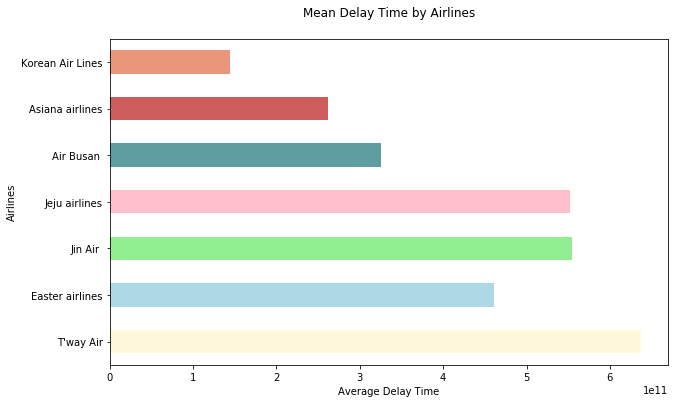

In [0]:
colors_list = ['cornsilk', 'lightblue', 'lightgreen', 'pink', 'cadetblue', 'indianred', 'darksalmon']

global_stats['mean'].plot(kind = 'barh', figsize = (10, 6), colors = colors_list) 

plt.title('Mean Delay Time by Airlines', y = 1.05)
plt.xlabel('Average Delay Time')
plt.ylabel('Airlines')

#annotate value labels to each country
for index, value in enumerate(global_stats['mean']):
    plt.annotate(str(value), xy = (value + 300000, index - 0.1), color = 'midnightblue')

plt.show()

TypeError: ignored

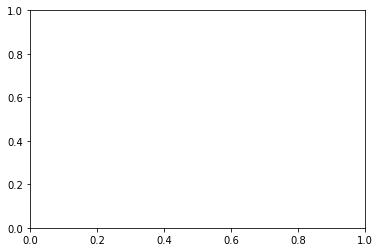

In [0]:
labels = global_stats['FLO']
N_means = global_stats[global_stats['DLY'] == 'N']
Y_means = global_stats[global_stats['DLY'] == 'Y']

# sns.set(style="whitegrid")
#ax = sns.barplot(x="FLO", y= 'mean', hue = "DLY", data= global_stats)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, N_means, width, label='On time (t < 30)')
rects2 = ax.bar(x + width/2, Y_means, width, label='Delayed (t >30)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time')
ax.set_title('Average Delay Time by DLY', y = 1.05)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 'upper right')

fig.tight_layout()

plt.show()

In [0]:
#Split dataframe into two dataframes
global_stats1 = global_stats.iloc[:7]
global_stats1 = global_stats1.set_index('FLO', inplace = True)
#global_stats2 = global_stats.iloc[:, 7:]
print(global_stats1)

None


In [0]:
global_stats1 = global_stats1['mean']].set_index('FLO', inplace = True)
global_stats1.plot(kind = 'barh', figsize = (10, 6))

plt.title('Average Delay Time in case delayed')
plt.xlabel('Time')
plt.ylabel('Airlines')

plt.show()

TypeError: ignored

In [0]:
print(global_stats)

                 FLO DLY  ...                      mean                min
0          T'way Air   Y  ...    0 days 00:54:42.482233  -1 days +01:02:00
1    Easter airlines   Y  ...    0 days 00:57:59.018590    0 days 00:31:00
2         Air Busan    Y  ...    0 days 00:54:20.363312    0 days 00:31:00
3           Jin Air    Y  ...    0 days 00:51:51.587982    0 days 00:31:00
4      Jeju airlines   Y  ...    0 days 00:52:46.859138    0 days 00:31:00
5    Asiana airlines   Y  ...    0 days 00:55:51.853116    0 days 00:31:00
6   Korean Air Lines   Y  ...    0 days 00:49:57.981169  -1 days +09:08:00
7          T'way Air   N  ...    0 days 00:03:22.559672  -1 days +01:05:00
8    Easter airlines   N  ...  -1 days +23:59:21.023062  -1 days +00:05:00
9           Jin Air    N  ...    0 days 00:01:26.959139  -1 days +01:05:00
10     Jeju airlines   N  ...    0 days 00:02:09.807590  -1 days +00:10:00
11        Air Busan    N  ...  -1 days +23:59:30.622394  -1 days +00:50:00
12   Asiana airlines   N 

In [0]:
delays = list(map(float, global_stats['mean']))
delays

['0 days 00:54:42.482233',
 '0 days 00:57:59.018590',
 '0 days 00:54:20.363312',
 '0 days 00:51:51.587982',
 '0 days 00:52:46.859138',
 '0 days 00:55:51.853116',
 '0 days 00:49:57.981169',
 '0 days 00:03:22.559672',
 '-1 days +23:59:21.023062',
 '0 days 00:01:26.959139',
 '0 days 00:02:09.807590',
 '-1 days +23:59:30.622394',
 '-1 days +23:57:24.057805',
 '-1 days +23:57:28.662081']

# Departure & Arrival

###Tip! Ways to select row
 
  There are main 3 ways to select rows:

```python
    df.loc[label]        
        #filters by the labels of the index/column
    df.iloc[index]       
        #filters by the positions of the index/column
```

#### .loc and .iloc are different?

Absolutely. It's Label based locating, and Integer based locating, which literally stand for 'Label of Column' and 'Index/Integer of Column' respectively. 

In [0]:
df.head()

,Date,Delay_time,AOD,ARP,ODP,FLO,FLT,IRR,DLY,DRR,CNL,CNR
0,2017-01-01,00:27:00,D,ARP3,ARP6,Korean Air Lines,J1955,N,N,NaN,N,NaN
1,2017-01-01,00:01:00,A,ARP3,ARP6,Korean Air Lines,J1954,N,N,NaN,N,NaN
2,2017-01-01,00:18:00,A,ARP3,ARP6,Korean Air Lines,J1956,N,N,NaN,N,NaN
3,2017-01-01,00:44:00,D,ARP3,ARP6,Korean Air Lines,J1957,N,Y,C02,N,NaN
4,2017-01-01,00:21:00,A,ARP3,ARP6,Korean Air Lines,J1958,N,N,NaN,N,NaN


## 1. Departure airport

Text(0.5, 1.0, 'Flights From Each Airport')

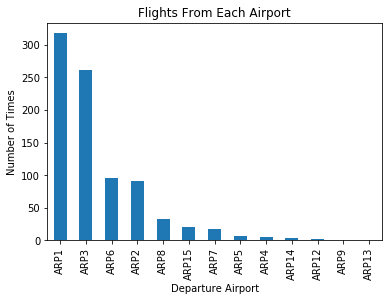

In [0]:
df3_dpt = df3[df3['AOD'] == 'D']
df3_dpt.ARP.value_counts().plot(kind = 'bar')


plt.xlabel('Departure Airport')
plt.ylabel('Number of Times')
plt.title('Flights From Each Airport')

## 2. Arrival airport

,Date,SDT_DY,ARP,ODP,FLT,AOD,IRR,STT,Intervals,DLY,DRR
618,2017-01-03,È­,ARP14,ARP3,J1855,A,N,12:15,01:22:00,Y,A01
163232,2017-01-03,È­,ARP6,ARP3,F1706,A,N,9:00,01:16:00,Y,A01


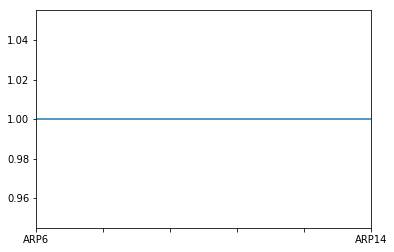

In [0]:
df3.head()
df3_arrival = df3[(df3['AOD'] == 'A') & (df3['Date'] == '2017-01-03')]
df3_arrival.ARP.value_counts().plot(kind = 'line')

df3_arrival.head()

# Scraping SIGMET data

In [0]:
from bs4 import BeautifulSoup
import requests

base_url = "http://amoapi.kma.go.kr/amoApi/iwxxm/sigmet"
response = requests.get(base_url)
soup = BeautifulSoup(response.content, 'xml')
items = soup.find_all('item')
print(items)

[]
